<a href="https://colab.research.google.com/github/gulabpatel/Table_Detection/blob/main/03%3A%20Extract_Title%2C_Text%2C_Images_%2C_Table%2C_List_from_Documents(PDFs%2C_Images_etc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video walkthrough the code : https://www.youtube.com/watch?v=aC6PWUCSKpg

github repo : https://github.com/Layout-Parser/layout-parser

In [ ]:
!pip install -U layoutparser

     |████████████████████████████████| 19.1MB 153kB/s 
     |████████████████████████████████| 645kB 24.8MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-iv6vb80_/detectron2
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-iv6vb80_/detectron2
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 112kB 45.3MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5471366 sha256=3545cb595f0557a1b392a3e199405e5056436e5d65499651aa1bc73fc0065d02
  Stored in directory: /tmp/pip-ephem-wheel-cache-9wj20omf/wheels/24/b4/77/2e5f8651761d4b6bd53b5e024a97583d9b043636c0c077ad4d
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=396a2800d4ca81142b8e1ba737ef5133b4091a010e1693d7eec1066cdc53453e
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df

In [ ]:
!pip install layoutparser[ocr]     

     |████████████████████████████████| 440kB 36.8MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=f193d525a24045736b7b837f41e221a73970ac35f200b56b3611998205ff2321
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract


In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1034, done.
remote: Counting objects: 100% (540/540), done.
remote: Compressing objects: 100% (279/279), done.
remote: Total 1034 (delta 305), reused 428 (delta 213), pack-reused 494
Receiving objects: 100% (1034/1034), 63.67 MiB | 37.54 MiB/s, done.
Resolving deltas: 100% (534/534), done.


In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
import cv2
image = cv2.imread("/content/layout-parser/examples/data/paper-image.jpg")
image = image[..., ::-1] 

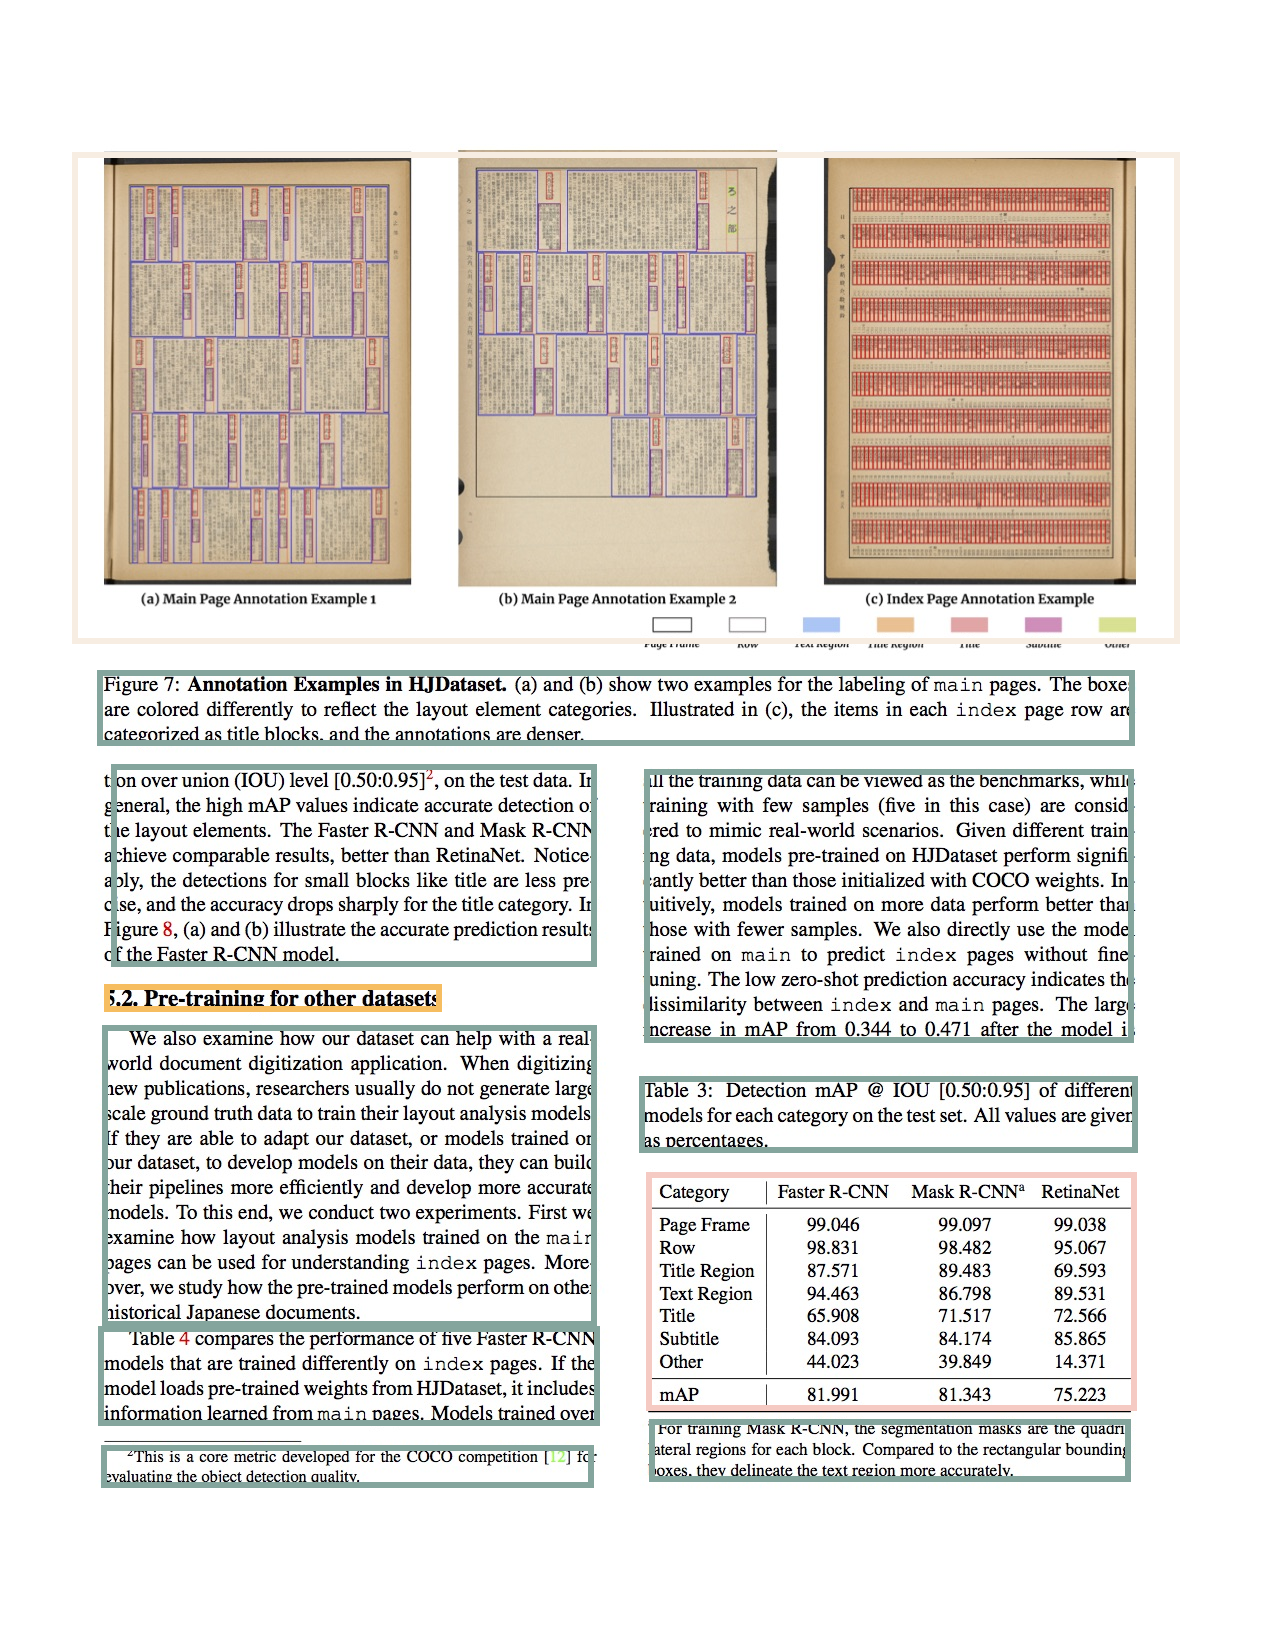

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Title"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=104.18392944335938, y_1=984.3191528320312, x_2=441.5095520019531, y_2=1011.412841796875), text=None, id=None, type=Title, parent=None, next=None, score=0.9871368408203125)], page_data={})

In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
figure_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=72.328857421875, y_1=152.18548583984375, x_2=1179.62939453125, y_2=643.6030883789062), text=None, id=None, type=Figure, parent=None, next=None, score=0.9979682564735413)], page_data={})

In [ ]:

text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

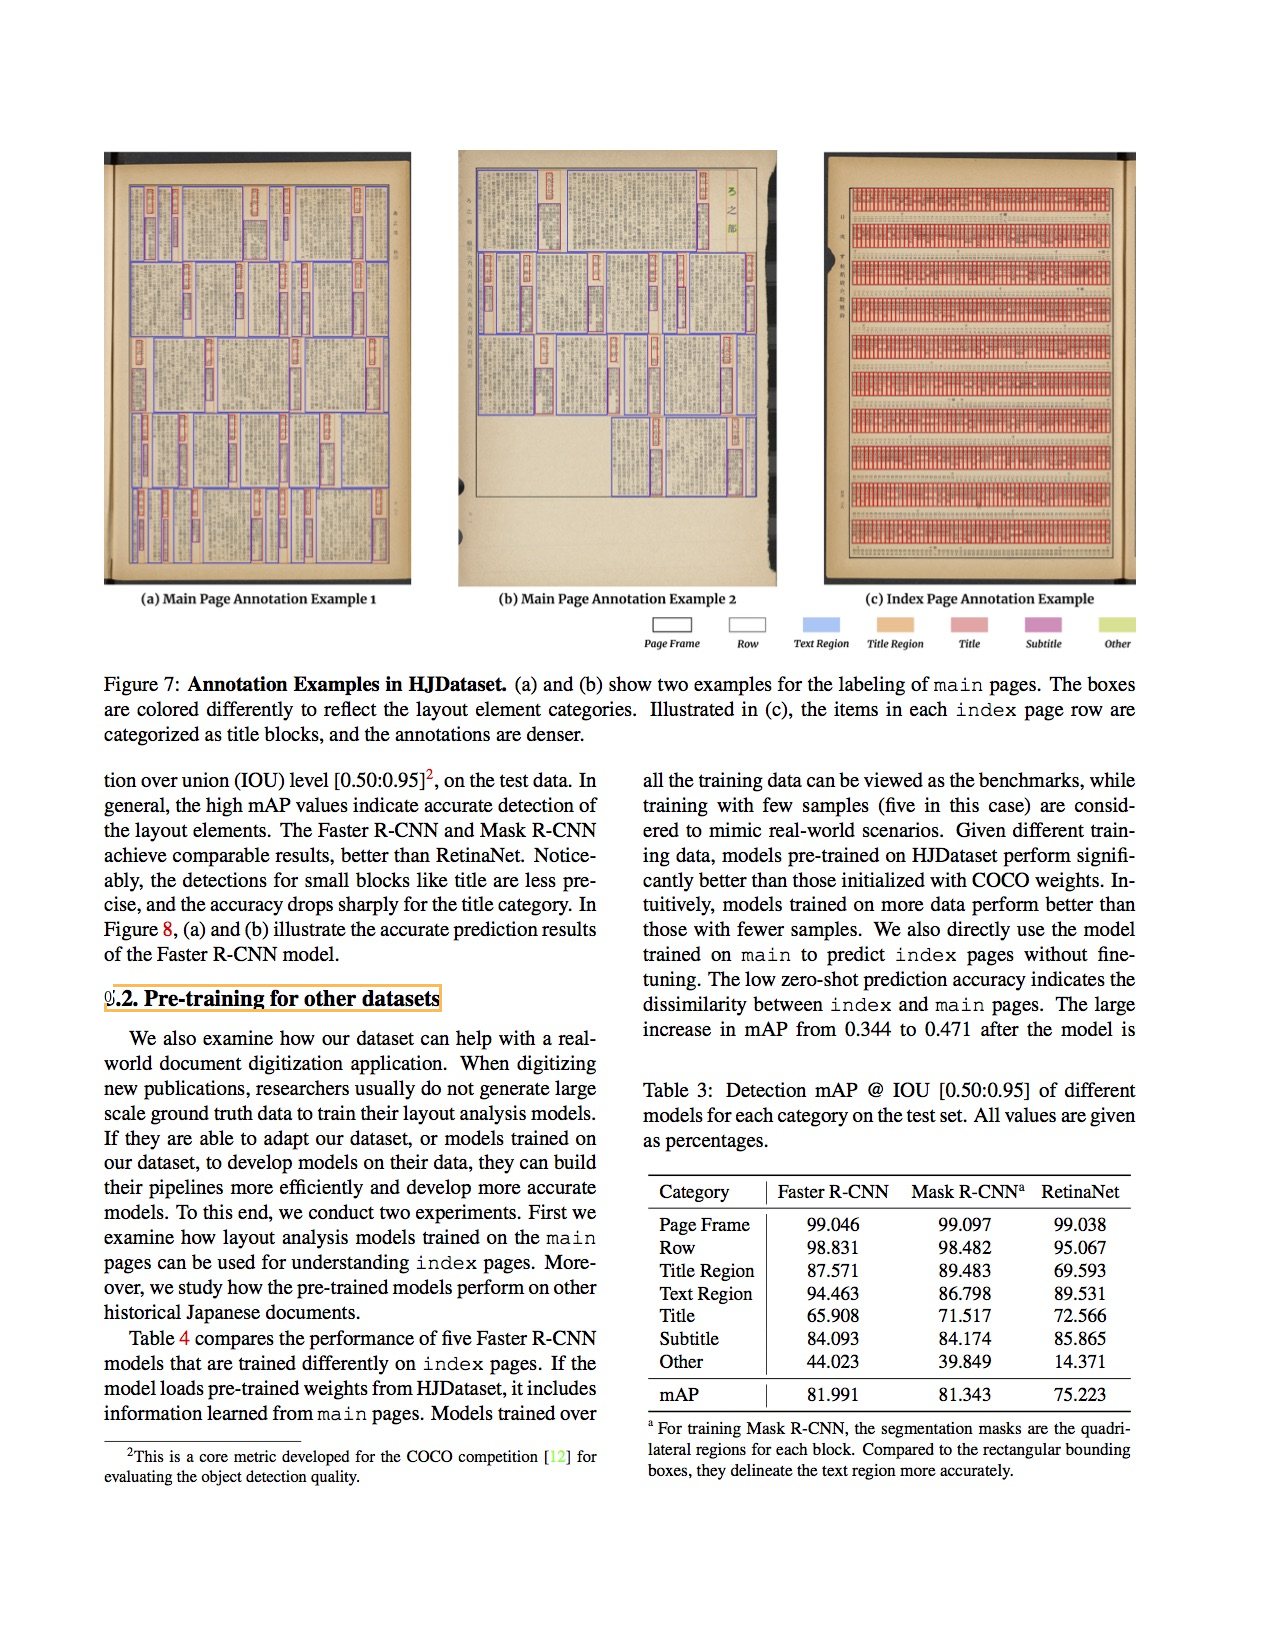

In [ ]:

lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,487 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

5.2. Pre-training for other datasets

---


In [ ]:
text_blocks.get_texts()

['5.2. Pre-training for other datasets\n\x0c']

In [ ]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=104.18392944335938, y_1=984.3191528320312, x_2=441.5095520019531, y_2=1011.412841796875), text=5.2. Pre-training for other datasets
, id=0, type=Title, parent=None, next=None, score=0.9871368408203125)


In [ ]:
!pip install spacy

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 1.0MB 38.7MB/s 
     |████████████████████████████████| 2.3MB 43.3MB/s 
     |████████████████████████████████| 460kB 47.4MB/s 
     |████████████████████████████████| 12.8MB 248kB/s 
     |████████████████████████████████| 3.3MB 50.5MB/s 
     |████████████████████████████████| 901kB 50.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 9.1MB 53.2MB/s 
     |████████████████████████████████| 624kB 47.5MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
2021-06-30 16:51:57.88

In [ ]:
!pip install click==7.1.1

     |████████████████████████████████| 92kB 10.1MB/s 
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")


In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)  

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)